In [1]:
import pandas as pd
import georinex as gr
import misc
from plots import *
import copy

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from logparser import LogReader, PosReader, RinexReader

# Prepare the data

In [30]:
# Load log files
measurements_log = ['Raw', 'Fix']
measurements_RINEX = sum([[f"{y}{x}" for y in ['C']] for x in ['1C', '5Q', '2I', '5P']], [])
measurements_RINEX = ['L1C']
# 'C1C', 'C5Q', 'C2I', 'C5P'

logs = []

log = LogReader(manufacturer="Google", device="Pixel 7", specifiedTags=measurements_log, mode="logger", 
                filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_GooglePixel7_20230801110405_modified.txt")
log.ref = RinexReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-14-05.23O',
              tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
              meas=measurements_RINEX, sampling=1)
log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-14-05.pos')
logs.append(log)

# log = LogReader(manufacturer="Google", device="Pixel Watch", specifiedTags=measurements_log, mode="mimir", 
#                 filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_GooglePixelWatch_20230801110404_modified.txt")
# log.ref = gr.load('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-14-05.23O',
#               tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
#               meas=measurements_RINEX)
# log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover /NMND17420010S_2023-08-01_08-14-05.pos')
# logs.append(log)

# log = LogReader(manufacturer="OnePlus", device="Nord 2", specifiedTags=measurements_log, mode="mimir", 
#                 filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_OnePlusNord2_20230811103018_modified.txt")
# log.ref = gr.load('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-11_07-40-20.23O',
#               tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
#               meas=measurements_RINEX)
# log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-11_07-40-20.pos')
# logs.append(log)

# log = LogReader(manufacturer="Samsung", device="A52", specifiedTags=measurements_log, mode="mimir", 
#                 filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_SamsungA52_20230811101903_modified.txt")
# log.ref = gr.load('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-11_07-29-33.23O',
#               tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
#               meas=measurements_RINEX)
# log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-11_07-29-33.pos')
# logs.append(log)

# log = LogReader(manufacturer="Xiaomi", device="11T", specifiedTags=measurements_log, mode="mimir", 
#                 filepath="../.data/2023_Dataset_Hervanta/S2_dynamic_campus/raw/log_Xiaomi11T_20230801111451_modified.txt")
# log.ref = gr.load('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-24-35.23O',
#               tlim=[log.raw.iloc[0].name.isoformat(), log.raw.iloc[-1].name.isoformat()],
#              meas=measurements_RINEX)
# log.pos = PosReader('../.data/2023_Dataset_Hervanta/S2_dynamic_campus/_reference/rover/NMND17420010S_2023-08-01_08-24-35.pos')
# logs.append(log)

device_list = [log.device for log in logs]

In [ ]:
log.raw.loc[log.raw['prn'].isin(['C20-L5']), ['CarrierFrequencyHz']]


,CarrierFrequencyHz
datetime,
2023-08-01 08:14:54.293,1.176450e+09
2023-08-01 08:14:56.307,1.176450e+09
2023-08-01 08:14:59.151,1.176450e+09
2023-08-01 08:15:01.126,1.176450e+09
2023-08-01 08:15:02.142,1.176450e+09
...,...
2023-08-01 08:24:12.161,1.176450e+09
2023-08-01 08:24:13.158,1.176450e+09
2023-08-01 08:24:17.149,1.176450e+09


In [ ]:
log.pos.df

,provider,timestamp,latitude,longitude,altitude
datetime,,,,,
2023-08-01 08:14:36,REF,1.690878e+09,61.449224,23.856273,163.0371
2023-08-01 08:14:37,REF,1.690878e+09,61.449224,23.856273,163.0365
2023-08-01 08:14:38,REF,1.690878e+09,61.449224,23.856272,163.0390
2023-08-01 08:14:39,REF,1.690878e+09,61.449225,23.856269,163.0332
2023-08-01 08:14:40,REF,1.690878e+09,61.449222,23.856274,162.7518
...,...,...,...,...,...
2023-08-01 08:24:31,REF,1.690878e+09,61.449222,23.856280,163.1328
2023-08-01 08:24:32,REF,1.690878e+09,61.449220,23.856276,163.0274
2023-08-01 08:24:33,REF,1.690878e+09,61.449219,23.856277,163.0225


sv
E02    Axes(0.125,0.2;0.775x0.68)
E07    Axes(0.125,0.2;0.775x0.68)
E10    Axes(0.125,0.2;0.775x0.68)
E11    Axes(0.125,0.2;0.775x0.68)
E12    Axes(0.125,0.2;0.775x0.68)
E19    Axes(0.125,0.2;0.775x0.68)
E24    Axes(0.125,0.2;0.775x0.68)
E25    Axes(0.125,0.2;0.775x0.68)
E33    Axes(0.125,0.2;0.775x0.68)
G02    Axes(0.125,0.2;0.775x0.68)
G08    Axes(0.125,0.2;0.775x0.68)
G10    Axes(0.125,0.2;0.775x0.68)
G13    Axes(0.125,0.2;0.775x0.68)
G15    Axes(0.125,0.2;0.775x0.68)
G16    Axes(0.125,0.2;0.775x0.68)
G18    Axes(0.125,0.2;0.775x0.68)
G21    Axes(0.125,0.2;0.775x0.68)
G23    Axes(0.125,0.2;0.775x0.68)
G27    Axes(0.125,0.2;0.775x0.68)
G30    Axes(0.125,0.2;0.775x0.68)
J04    Axes(0.125,0.2;0.775x0.68)
R01    Axes(0.125,0.2;0.775x0.68)
R02    Axes(0.125,0.2;0.775x0.68)
R03    Axes(0.125,0.2;0.775x0.68)
R09    Axes(0.125,0.2;0.775x0.68)
R10    Axes(0.125,0.2;0.775x0.68)
R17    Axes(0.125,0.2;0.775x0.68)
R18    Axes(0.125,0.2;0.775x0.68)
R19    Axes(0.125,0.2;0.775x0.68)
Name: L1C_e

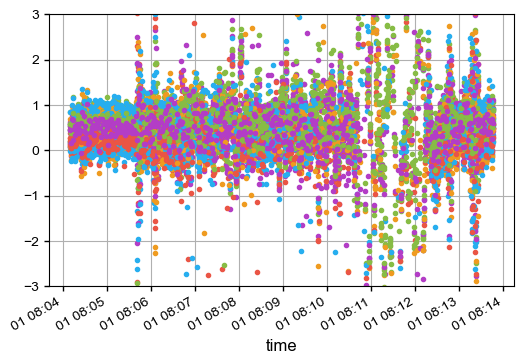

In [42]:

log.ref.df.groupby('sv')['L1C_error'].plot(ylim=[-3, 3], style='.')

In [ ]:
# Compute ENU errors
ref_enu = [61.44922404, 23.8562781, 162.711]
for log in logs:
    # Convert to ENU based on reference
    log.fix[["east", "north", "up"]] = log.fix.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # window = 1
    # log.pos.df["latitude_avg"] = log.pos.df["latitude"].rolling(window).mean()
    # log.pos.df["longitude_avg"] = log.pos.df["longitude"].rolling(window).mean()
    # log.pos.df["altitude_avg"] = log.pos.df["altitude"].rolling(window).mean()

    log.pos.df[["east", "north", "up"]] = log.pos.df.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # Align/interpolates dataframes
    pos_A, pos_B = log.fix[["east", "north", "up"]].align(log.pos.df[["east", "north", "up"]])
    log.diff = pos_B.interpolate(method='time') - pos_A.interpolate(method='time')
    log.diff.dropna(how='all', inplace=True)
    
    log.diff[["2D_error"]] = log.diff.apply(
        lambda row: misc.getHorizontalError(row['east'], row['north']), 
        axis='columns', result_type='expand')
    
    log.diff[["3D_error"]] = log.diff.apply(
        lambda row: misc.get3DError(row['east'], row['north'], row['up']), 
        axis='columns', result_type='expand')

    print(f"--- {log.device} ---")
    print(log.diff[["east", "north", "up", "2D_error", "3D_error"]].describe())

--- Pixel 7 ---
             east       north          up    2D_error    3D_error
count  627.000000  627.000000  627.000000  627.000000  627.000000
mean     0.371880   -0.444763   -6.927663    1.824681    7.572412
std      1.300549    1.969238    3.090132    1.603494    2.468003
min     -6.172954   -6.211736  -20.060630    0.078894    1.564468
25%     -0.010505   -1.351840   -7.954781    0.922860    6.305800
50%      0.329247   -0.965794   -6.629866    1.448422    6.875208
75%      0.807818   -0.008581   -6.038846    2.067478    8.150087
max     10.772448   14.858674   20.332651   15.984926   25.863770
--- Pixel Watch ---
             east       north          up    2D_error    3D_error
count  862.000000  862.000000  862.000000  862.000000  862.000000
mean     0.935102   -0.329131   -4.134536    2.725511    6.345669
std      2.034178    2.443932    5.341635    1.912466    4.053097
min     -9.294852  -11.117086  -34.250484    0.167605    0.496471
25%     -0.028827   -1.728611   -7.23448

In [ ]:
log.diff

,east,north,up,2D_error,3D_error
datetime,,,,,
2023-08-01 08:14:55,2.220516,1.263836,-10.387199,2.554990,10.696817
2023-08-01 08:14:56,1.716423,0.907118,-11.191900,1.941384,11.359031
2023-08-01 08:14:57,1.751256,0.606603,-11.258566,1.853339,11.410091
2023-08-01 08:14:58,1.727945,0.271095,-11.324333,1.749082,11.458613
2023-08-01 08:14:59,1.735093,-0.028195,-11.398700,1.735322,11.530035
...,...,...,...,...,...
2023-08-01 08:24:31,0.253807,0.616150,-11.967200,0.666377,11.985739
2023-08-01 08:24:32,0.062892,0.378896,-12.072600,0.384080,12.078708
2023-08-01 08:24:33,0.100659,0.281943,-12.077500,0.299373,12.081210


# Results

In [ ]:
center = ref_enu[:2]
extent = [center[1] - 0.001, center[1] + 0.006, center[0] - 0.0005, center[0] + 0.0015]


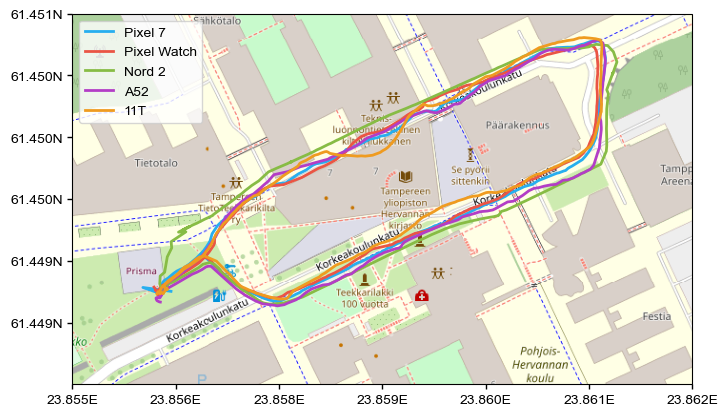

In [ ]:
locations = {}
for log in logs:
    locations[log.device] = log.fix.loc[log.fix['provider'].isin(['GPS']), ["latitude", "longitude"]]

plotMap(locations=locations, extent=extent, scale=17)

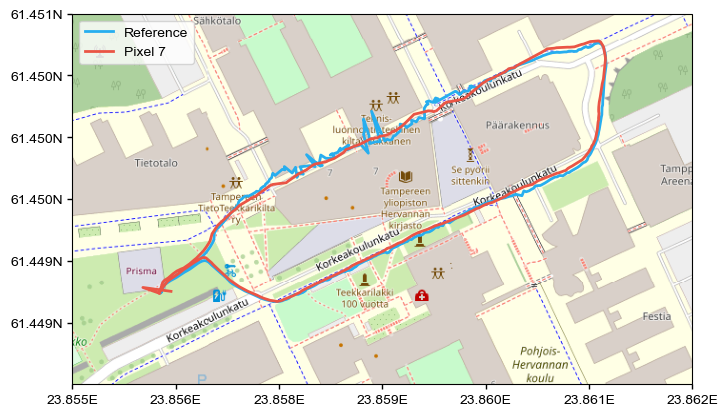

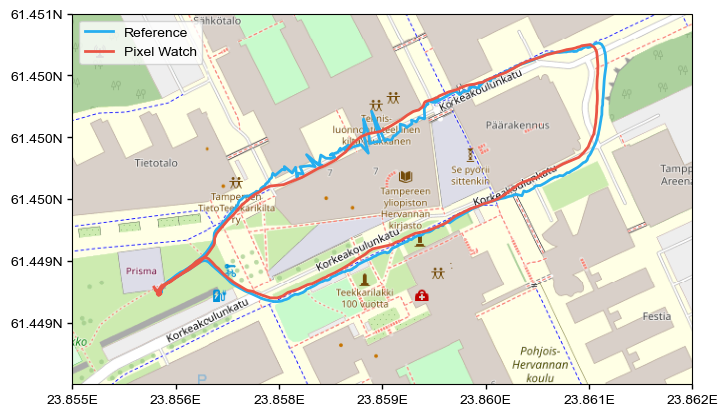

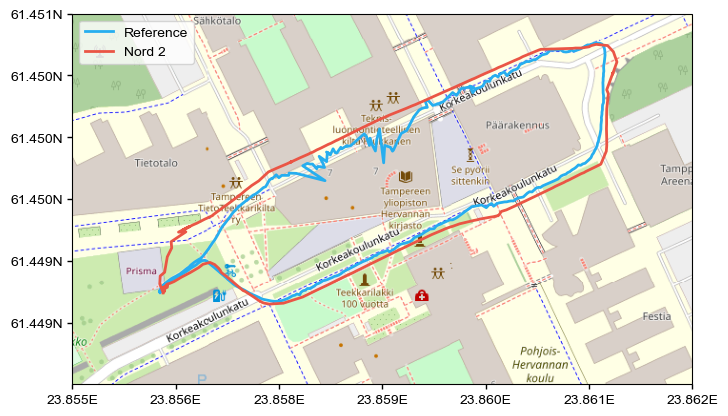

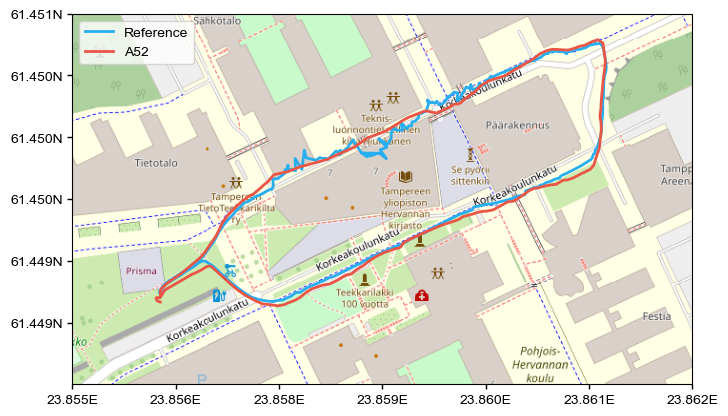

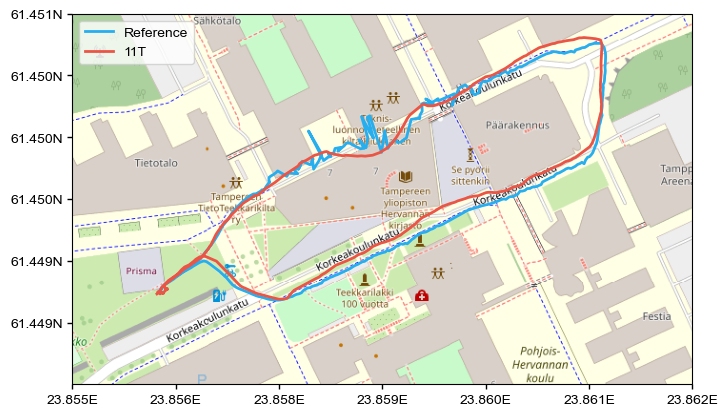

In [ ]:

for log in logs:
    locations = {}
    locations['Reference'] = log.pos.df[["latitude", "longitude"]]
    locations[log.device] = log.fix.loc[log.fix['provider'].isin(['GPS']), ["latitude", "longitude"]]
    plotMap(locations=locations, extent=extent, scale=17)

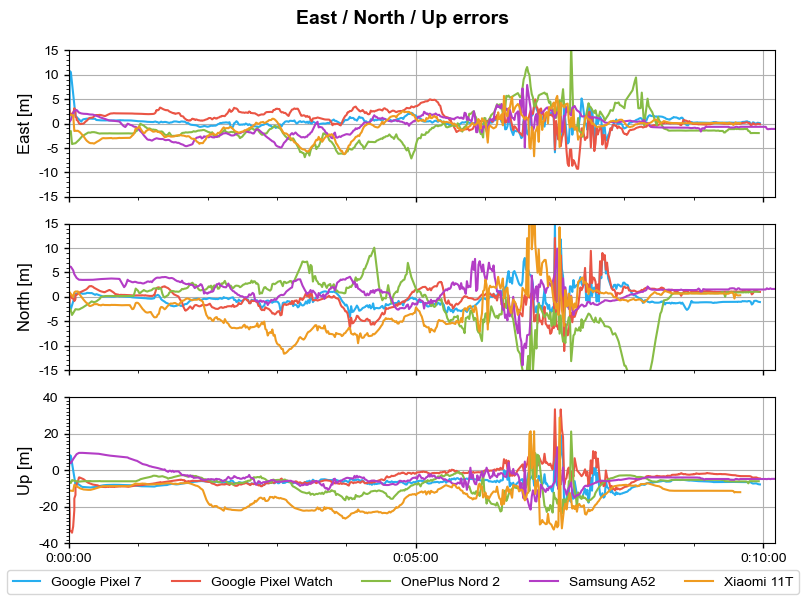

In [ ]:
plotENU(logs, lim=[15,15,40], ticks=[1, 5, 1, 5, 2, 20], mode='difference')

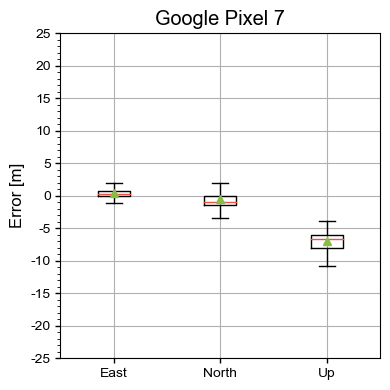

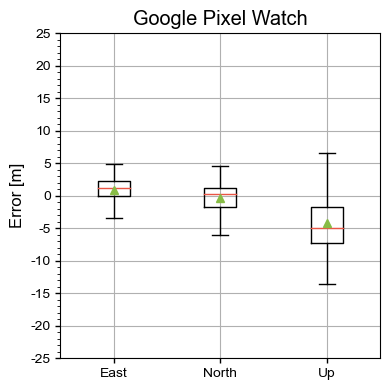

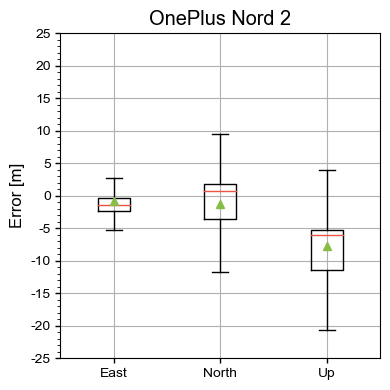

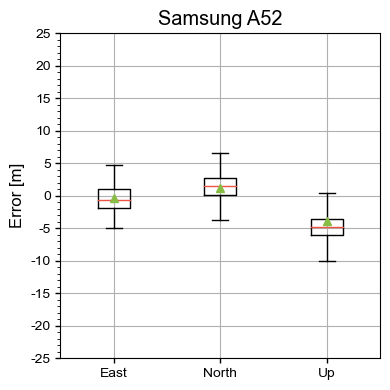

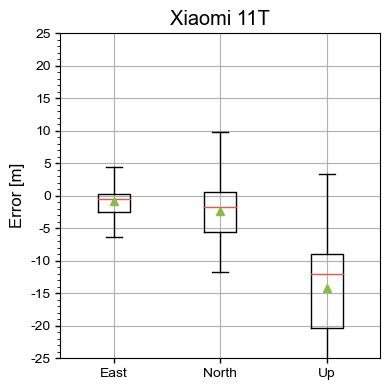

In [ ]:
plotStatisticsENU(logs, mode='box', lim=25, ticks=[1, 5])

### Visibility

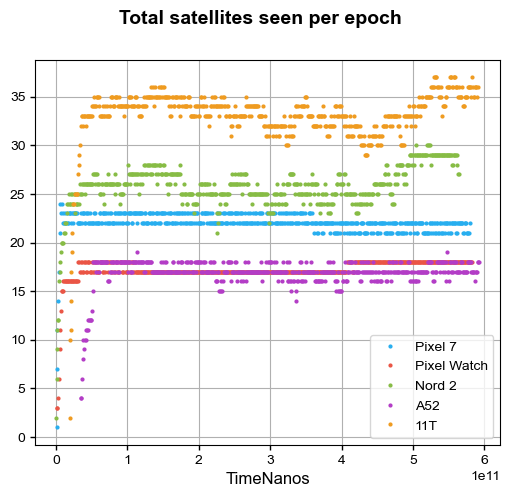

In [ ]:
plotTotalSatellitesPerEpochs(logs)

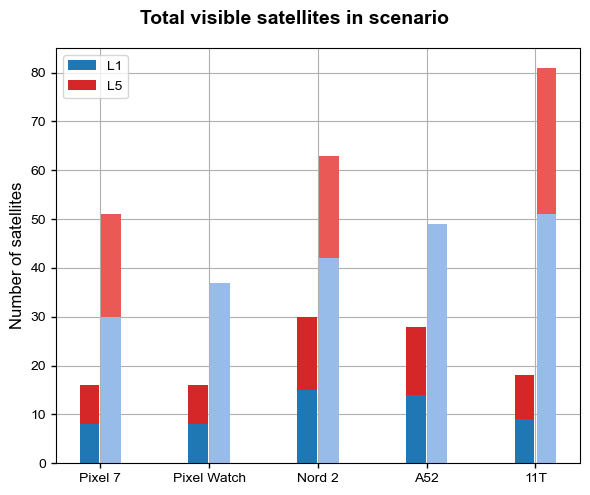

In [ ]:
plotTotalSatellitesBar(logs, normalised=False)

### Measurements

Pseudoranges

--- Pixel 7 ---
Rows removed 7 (0.058%)
--- Pixel Watch ---
Rows removed 15 (0.165%)
--- Nord 2 ---
Rows removed 90 (0.648%)
--- A52 ---
Rows removed 2 (0.022%)
--- 11T ---
Rows removed 131 (0.733%)
            Pixel 7  Pixel Watch        Nord 2          A52           11T
count  12018.000000  9068.000000  13805.000000  9201.000000  17734.000000
mean       0.124266     0.412511      0.553043     0.090261      0.280861
std        9.751511    18.186163     13.839678    15.079990     13.037994
min     -153.535509  -296.117558   -128.523523  -273.992238    -99.589489
50%        0.130270     0.152443      0.410159     0.105149      0.067308
66.7%      1.423095     1.971097      2.294482     1.770599      2.030527
95%       12.954853    20.372765     20.209591    19.243106     21.498014
99.7%     42.189841   110.580509     70.168420    68.167153     59.438550
max      246.958558   226.721222    138.471306   195.191331    143.734794


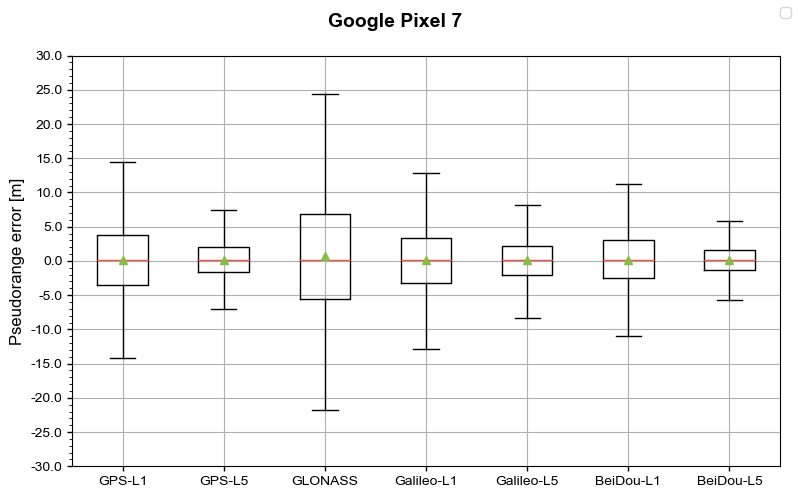

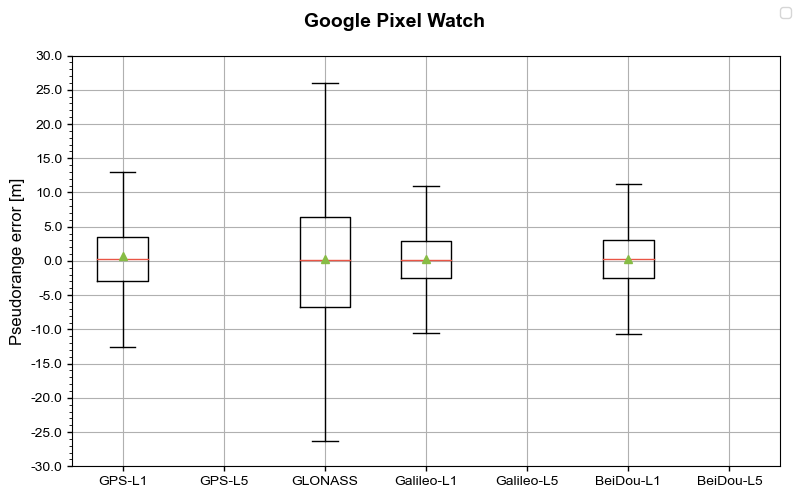

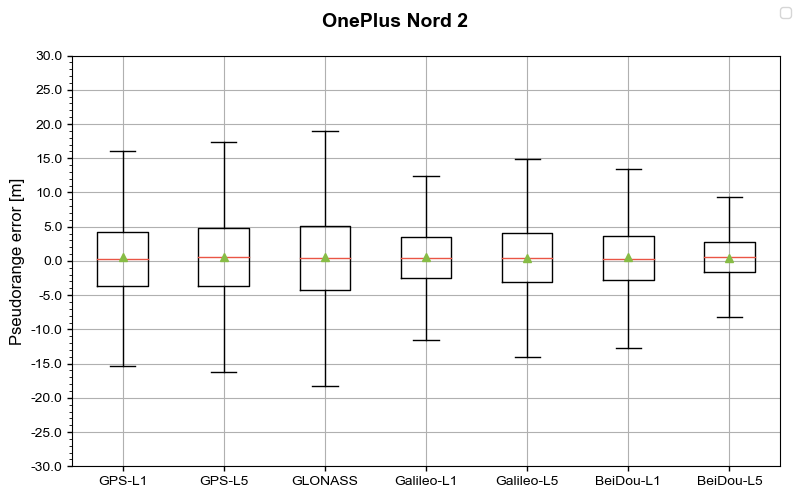

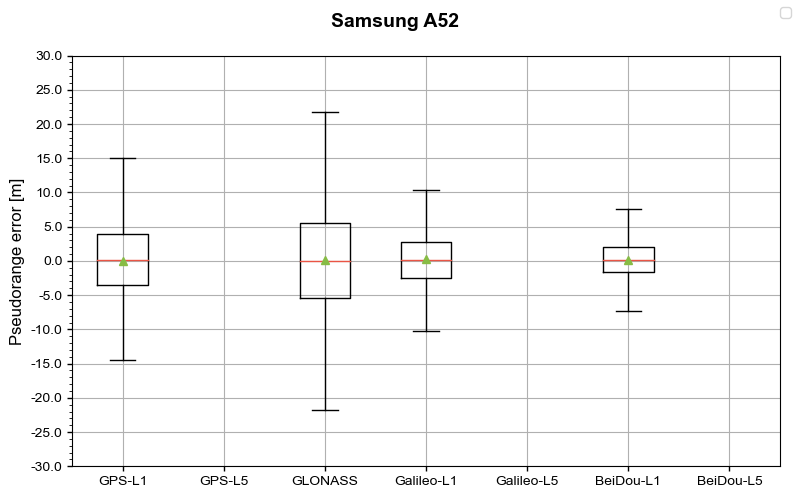

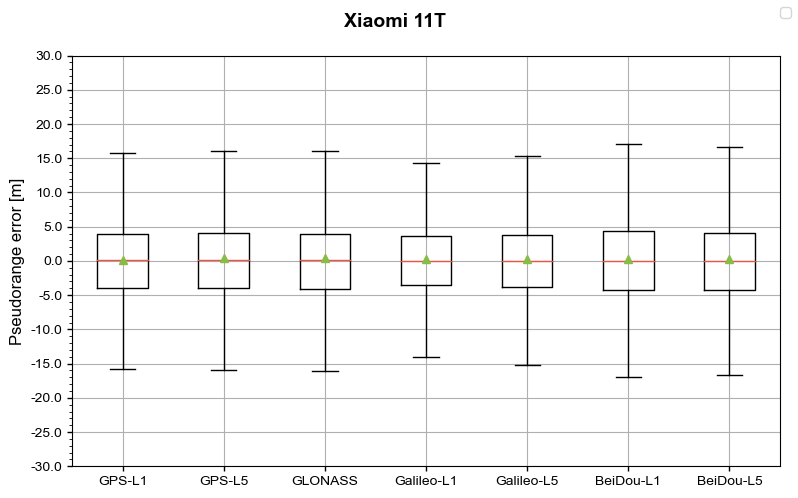

In [ ]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.raw = misc.filterValues(log.raw, 'PseudorangeAcceleration', 300)
    log.raw[list(misc.GnssState_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['State'], bits=17, type='tracking'), axis='columns', result_type='expand')
    stats.append(log.raw['PseudorangeAcceleration'].describe(percentiles=[0.5, .667, .95, .997]).T)
print(pd.concat(stats, keys=device_list, axis=1))

plotStatisticsDataBox(_logs, 
                      'PseudorangeAcceleration', 
                      'Pseudorange error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=30,
                      ticks=[1,5])

In [ ]:
for log in _logs:
    print(f"--- {log.device} ---")
    count = log.raw[list(misc.GnssState_Str.values())].count()
    df = log.raw[list(misc.GnssState_Str.values())].sum().div(count).mul(100).transpose()
    print(df)

--- Pixel 7 ---
TRACK_UNKNOWN                   0.000000
TRACK_CODE_LOCK                72.316525
TRACK_BIT_SYNC                 77.600266
TRACK_SUBFRAME_SYNC            46.172408
TRACK_TOW_DECODED              37.002829
TRACK_MSEC_AMBIGUOUS            0.000000
TRACK_SYMBOL_SYNC              77.600266
TRACK_GLO_STRING_SYNC           2.321518
TRACK_GLO_TOD_DECODED           2.321518
TRACK_BDS_D2_BIT_SYNC           0.000000
TRACK_BDS_D2_SUBFRAME_SYNC      0.000000
TRACK_GAL_E1BC_CODE_LOCK       15.809619
TRACK_GAL_E1C_2ND_CODE_LOCK    29.172907
TRACK_GAL_E1B_PAGE_SYNC         0.000000
TRACK_SBAS_SYNC                 0.000000
TRACK_TOW_KNOWN                97.678482
TRACK_GLO_TOD_KNOWN             2.321518
TRACK_S_2ND_CODE_LOCK          63.929106
dtype: float64
--- Pixel Watch ---
TRACK_UNKNOWN                   0.000000
TRACK_CODE_LOCK                64.523599
TRACK_BIT_SYNC                 89.358183
TRACK_SUBFRAME_SYNC            49.536833
TRACK_TOW_DECODED              49.702250
TRACK_

Doppler

--- Pixel 7 ---
Rows removed 0 (0.000%)
--- Pixel Watch ---
Rows removed 0 (0.000%)
--- Nord 2 ---
Rows removed 1 (0.007%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 0 (0.000%)
            Pixel 7  Pixel Watch        Nord 2          A52           11T
count  12738.000000  9991.000000  14510.000000  9411.000000  18909.000000
mean       0.075958     0.098080      0.317093     0.057992      0.006854
std        0.394933     0.374276      2.073268     0.650847      1.084866
min       -5.145190    -6.700270    -22.043684   -12.501771    -19.210938
50%        0.072259     0.093999      0.411657     0.061813      0.068526
66.7%      0.147373     0.186911      0.895515     0.257186      0.349689
95%        0.637539     0.638722      2.427668     1.090386      1.308547
99.7%      1.816113     1.608383     10.079438     2.109778      3.623602
max       10.059676     6.036480     13.690755     7.767997     21.976807


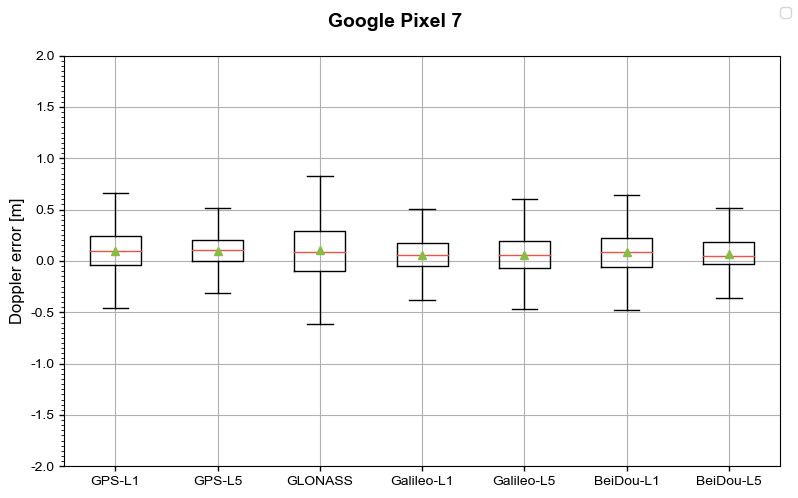

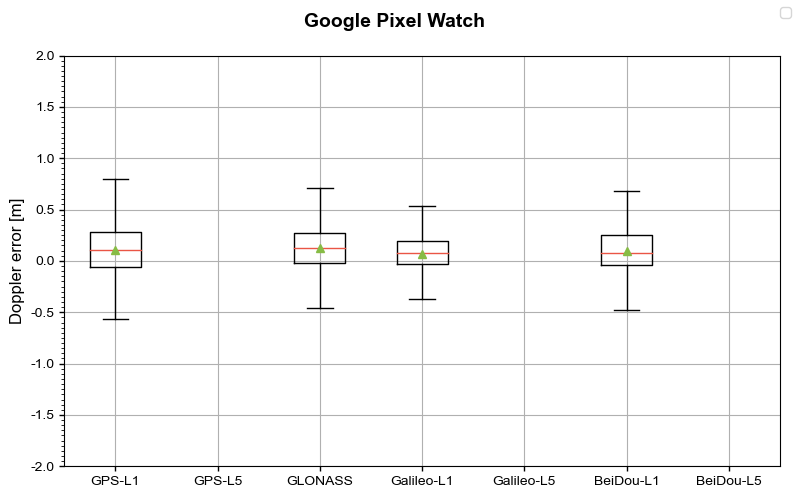

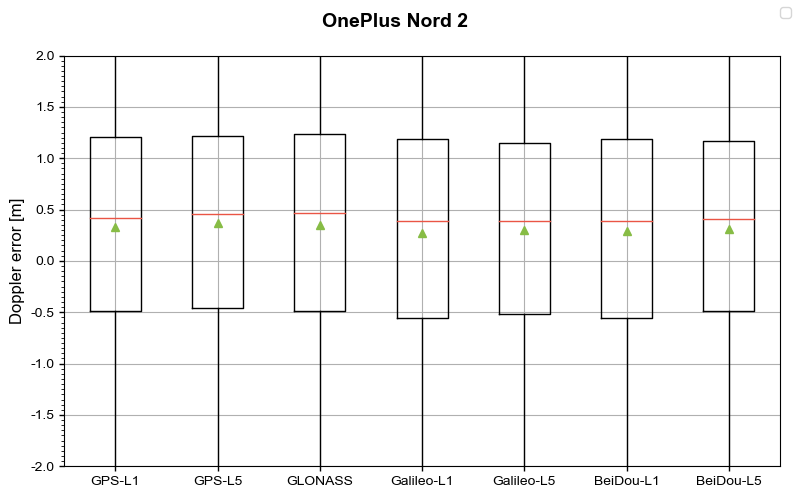

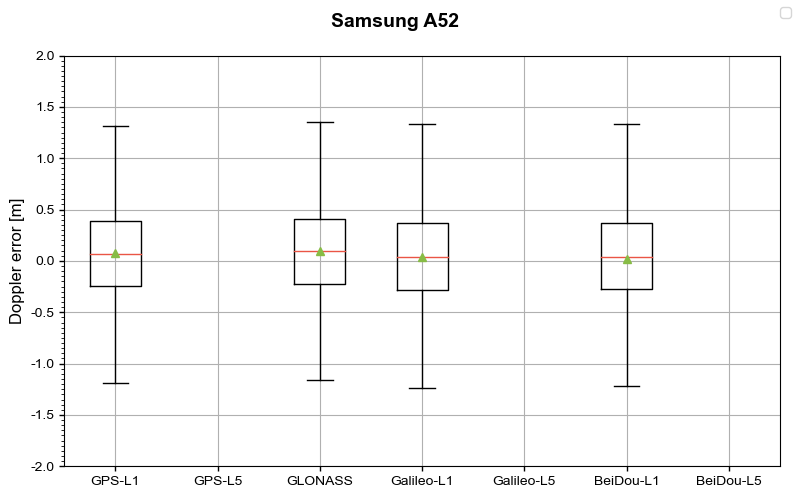

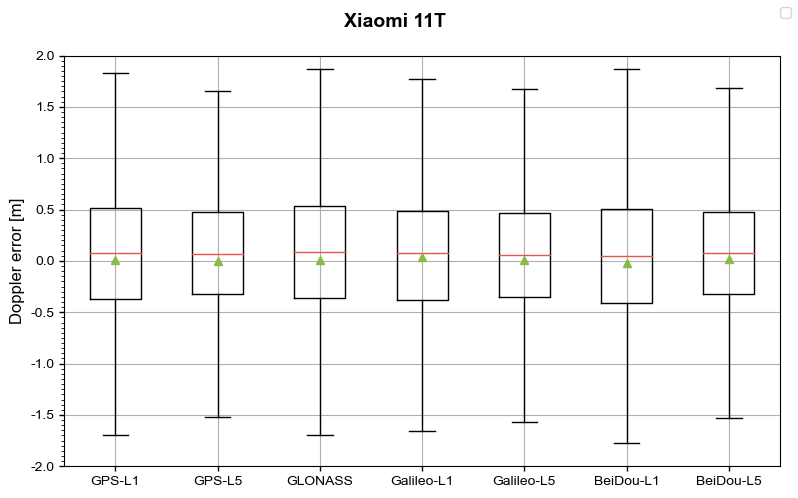

In [ ]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.raw = misc.filterValues(log.raw, 'DopplerError', 30)
    #log.raw = misc.filterPercentile(log.raw, 'DopplerError', 0.997)
    stats.append(log.raw['DopplerError'].describe(percentiles=[0.5, .667, .95, .997]).T)
print(pd.concat(stats, keys=device_list, axis=1))

plotStatisticsDataBox(_logs, 
                      'DopplerError', 
                      'Doppler error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=2,
                      ticks=[0.05,0.5])

Phases

--- Pixel 7 ---
Rows removed 218 (1.718%)
--- Pixel Watch ---
Rows removed 97 (0.974%)
--- Nord 2 ---
Rows removed 1435 (9.932%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 736 (3.909%)
            Pixel 7  Pixel Watch        Nord 2          A52           11T
count  12470.000000  9857.000000  13013.000000  9363.000000  18092.000000
mean       0.075095     0.097399      0.310543     0.059795      0.057394
std        0.376290     0.361435      1.225806     0.649776      0.869771
min       -5.145190    -6.700270     -5.650226   -12.501771    -10.546082
50%        0.072394     0.094265      0.402069     0.063192      0.078133
66.7%      0.146343     0.186862      0.850376     0.258753      0.354272
95%        0.624109     0.635610      2.124824     1.091176      1.274882
99.7%      1.683756     1.522154      3.930301     2.110481      3.057930
max        4.176464     3.076851     11.221985     7.767997     17.826782


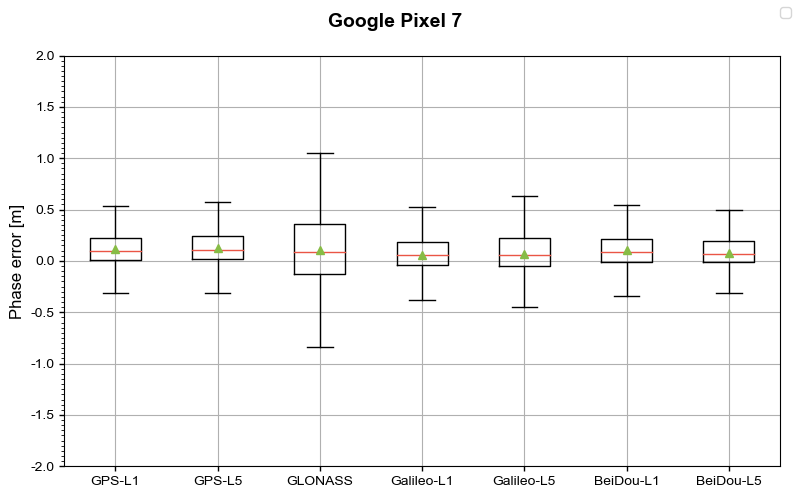

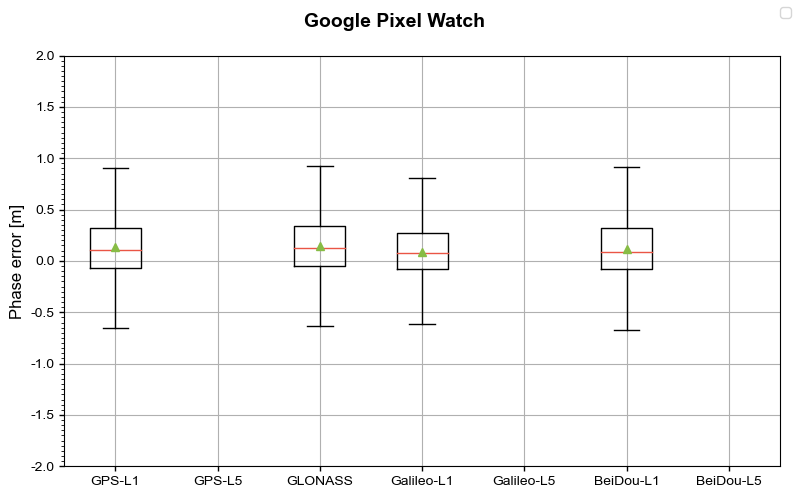

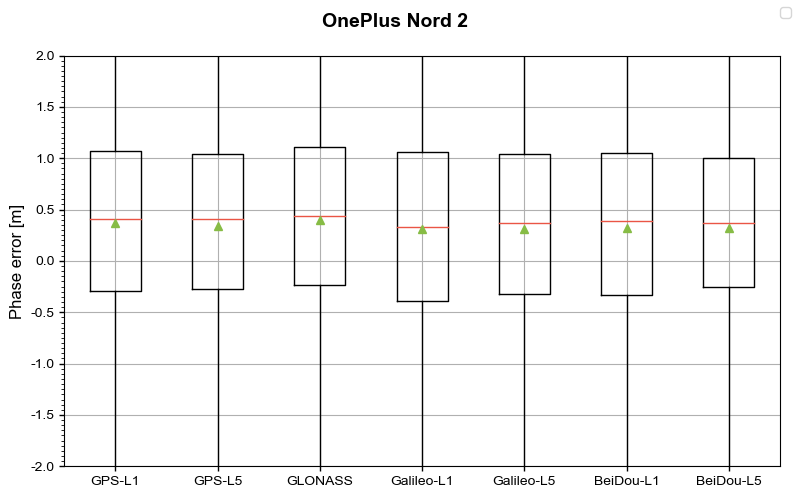

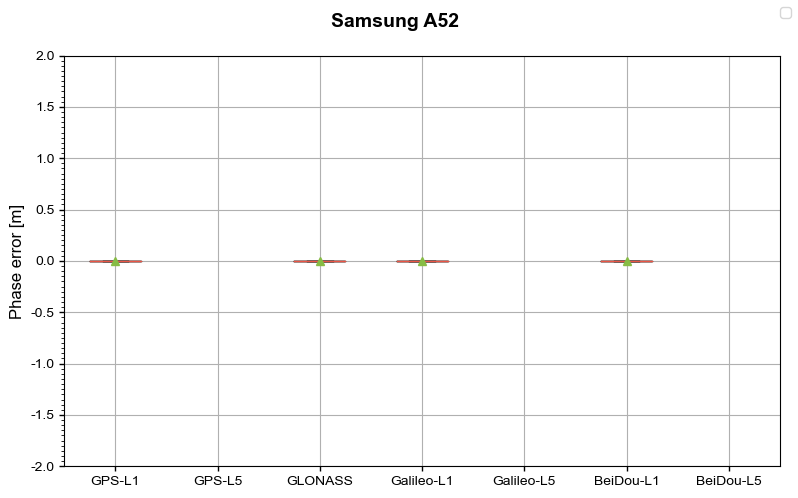

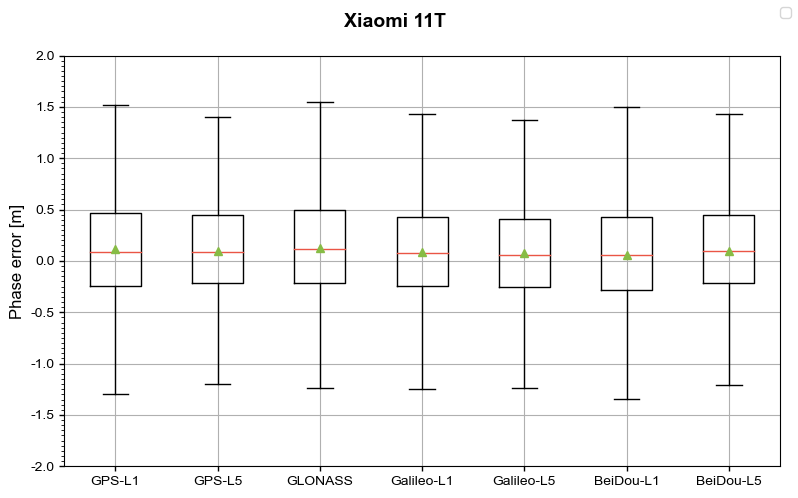

In [ ]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    #log.raw = misc.filterPercentile(log.raw, 'PhaseError', 0.997)
    log.raw = misc.filterValues(log.raw, 'PhaseError', 3)
    stats.append(log.raw['DopplerError'].describe(percentiles=[0.5, .667, .95, .997]).T)
print(pd.concat(stats, keys=device_list, axis=1))
plotStatisticsDataBox(_logs, 
                      'PhaseError', 
                      'Phase error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=2,
                      ticks=[0.05,0.5])
    

In [ ]:
_logs = copy.deepcopy(logs)
for log in _logs:
    log.raw[list(misc.GnssStateADR_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['AccumulatedDeltaRangeState'], bits=5, type='phase'), axis='columns', result_type='expand')


In [ ]:
for log in _logs:
    print(f"--- {log.device} ---")
    count = log.raw[list(misc.GnssStateADR_Str.values())].count()
    print(log.raw[list(misc.GnssStateADR_Str.values())].sum().div(count).mul(100))

--- Pixel 7 ---
ADR_UNKNOWN                  0.000000
ADR_VALID                   43.326296
ADR_RESET                    0.007819
ADR_CYCLE_SLIP               2.932207
ADR_HALF_CYCLE_RESOLVED     37.571350
ADR_HALF_CYCLE_REPORTED    100.000000
dtype: float64
--- Pixel Watch ---
ADR_UNKNOWN                  0.000000
ADR_VALID                   21.868767
ADR_RESET                    0.009972
ADR_CYCLE_SLIP               4.128440
ADR_HALF_CYCLE_RESOLVED     12.834065
ADR_HALF_CYCLE_REPORTED    100.000000
dtype: float64
--- Nord 2 ---
ADR_UNKNOWN                  0.000000
ADR_VALID                   65.925621
ADR_RESET                    0.000000
ADR_CYCLE_SLIP              27.672568
ADR_HALF_CYCLE_RESOLVED     41.608344
ADR_HALF_CYCLE_REPORTED    100.000000
dtype: float64
--- A52 ---
ADR_UNKNOWN                  0.0
ADR_VALID                    0.0
ADR_RESET                    0.0
ADR_CYCLE_SLIP               0.0
ADR_HALF_CYCLE_RESOLVED      0.0
ADR_HALF_CYCLE_REPORTED    100.0
dtype: flo

C/N0

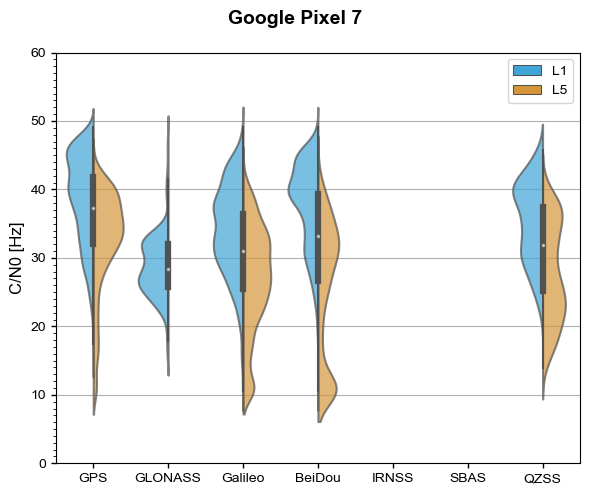

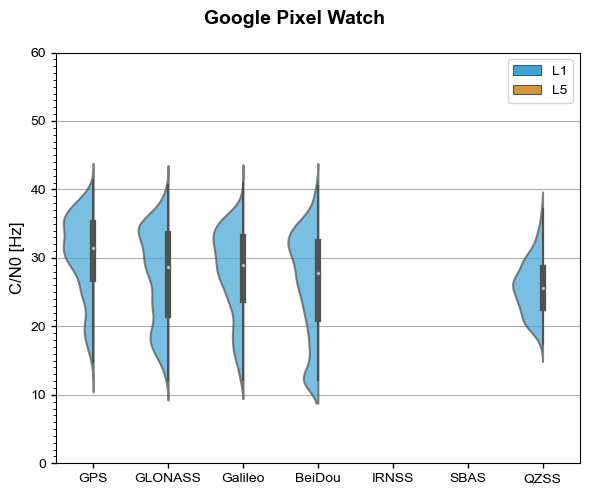

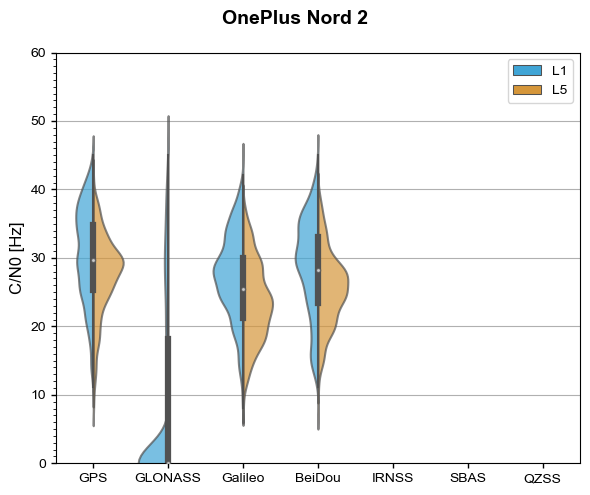

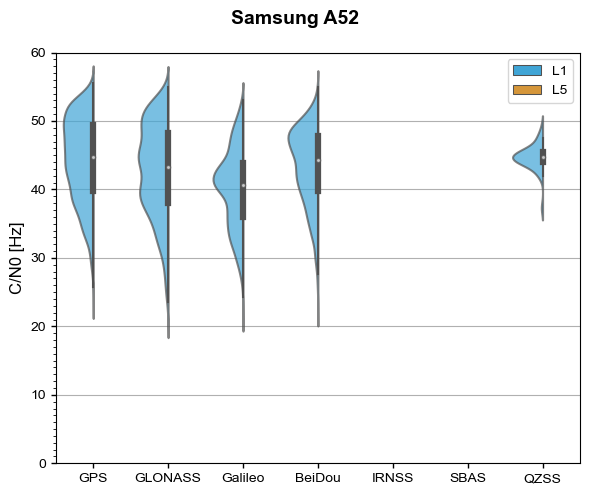

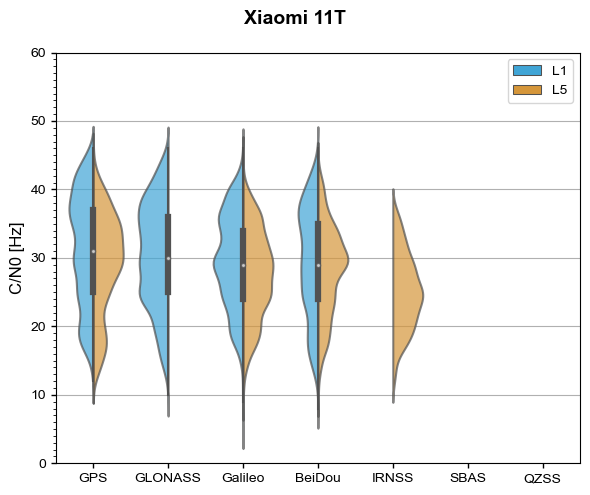

In [ ]:
_logs = copy.deepcopy(logs)
plotStatisticsDataViolin(
    _logs, 
    'Cn0DbHz', 
    'C/N0 [Hz]', 
    ('G', 'R', 'E', 'C', 'I', 'S', 'J'), 
    ('L1', 'L5'),
    lim=60,
    ticks=[1,10])